In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ggfortify)

In [3]:
library(scales)


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




In [4]:
library(corrplot)

corrplot 0.92 loaded



In [5]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

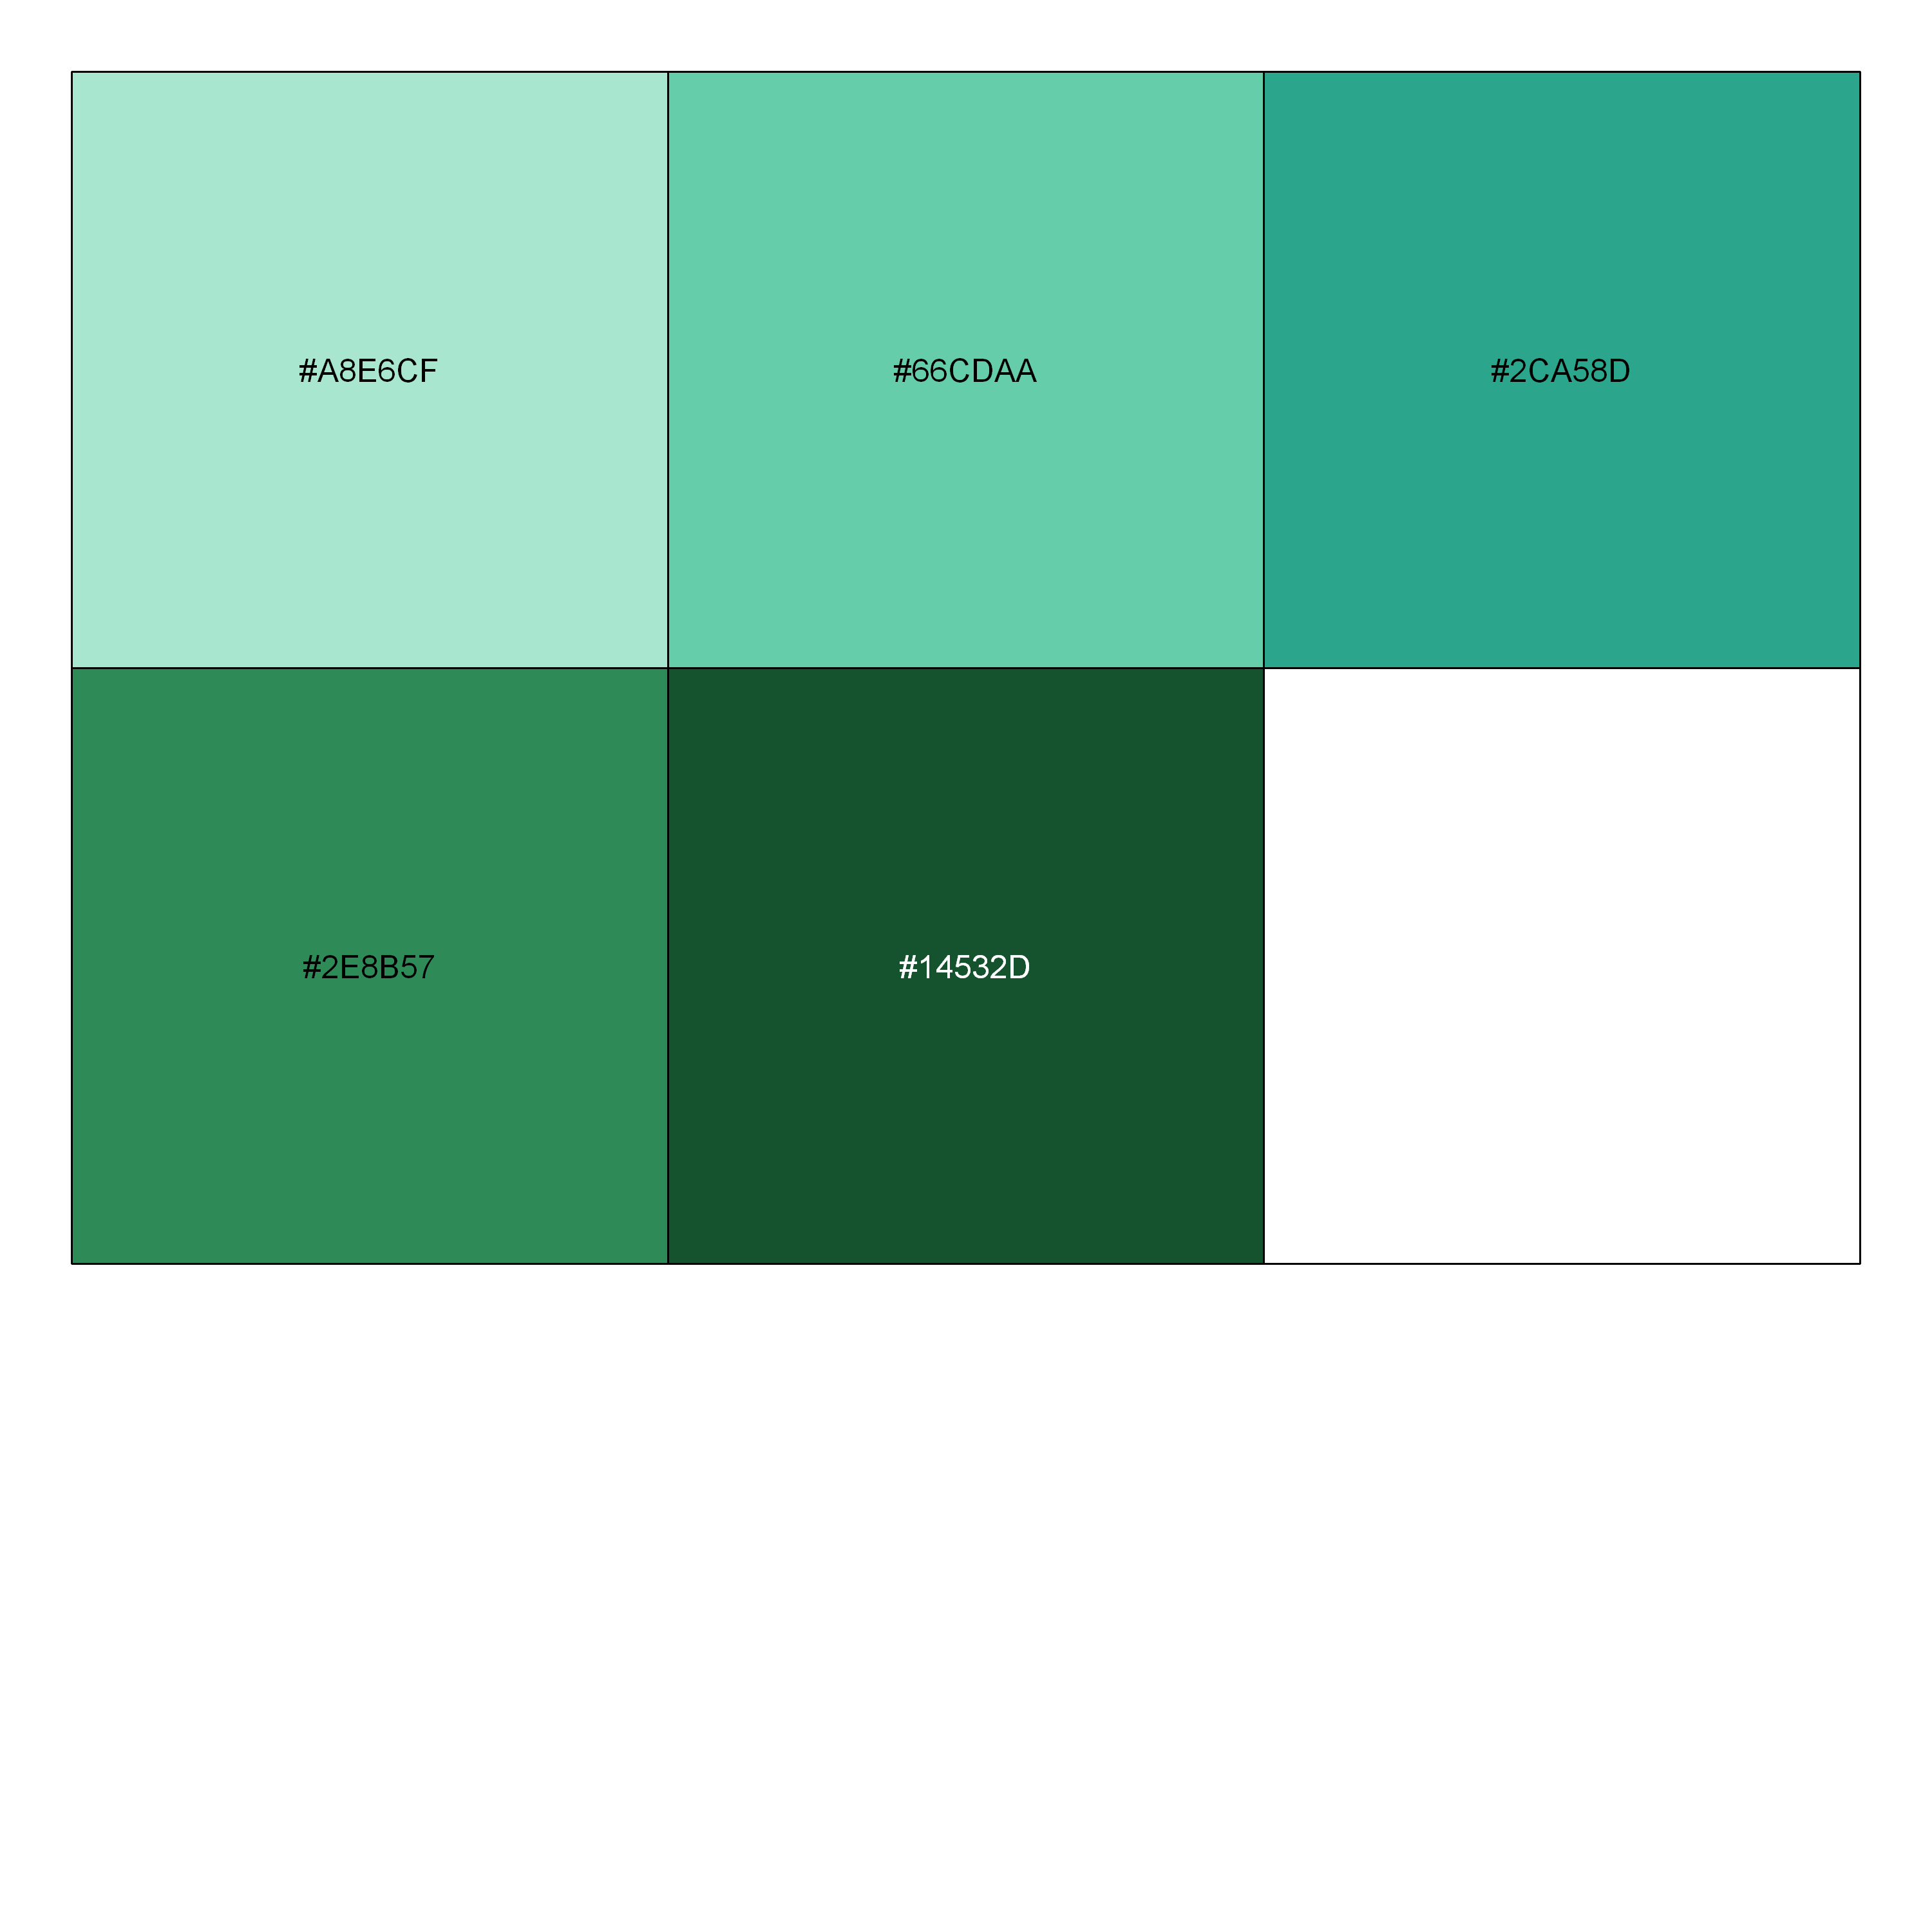

In [6]:
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
HCOLOR = '#E26A2C'
HCOLOR = '#984215'
 
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

tpal = brewer.pal(7, "BuGn")
gpal = brewer.pal(4, 'Dark2')
green_palette = c(
    "#A8E6CF",  # Light Mint – soft and fresh
    "#66CDAA",  # Medium Aquamarine – fresh and lively
    "#2CA58D",  # Viridian – rich and cool-toned
    "#2E8B57",  # Sea Green – deep and elegant
    "#14532D",   # Dark Forest – dramatic and grounding
    "#3CB371",  # Medium Sea Green – balanced and vibrant

    "#228B22",  # Forest Green – strong and grounded
    "#006400",   # Dark Green – bold and dramatic

    "#56C596",  # Jade Green – vibrant and noticeable
    "#1E5631"  # Deep Moss – earthy and bold
)
ann_colors = list(
    Timepoint = c('1'=green_palette[1], '2'=green_palette[2], '3'=green_palette[3], 
                  '4'=green_palette[4], '5'=green_palette[5]),
    Group.Timepoint = c(
        'P1'=green_palette[1], 'P2'=green_palette[2], 'P3'=green_palette[3], 
                  'P4'=green_palette[4], 'P5'=green_palette[5],
        'C1'=green_palette[1], 'C2'=green_palette[2], 'C3'=green_palette[3], 
                  'C4'=green_palette[4], 'C5'=green_palette[5]
    ),
    Group = c(P = PCOLOR_light, C = PRO_COLOR),
    treatment = c(ref = gpal[2], long.term=gpal[4]),
    Group.Timepoint.shapes = c(21,22,24,23,25,1,0,2,#5,
                               6)
    
)
#forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
#fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]
#show_col(green_palette)
show_col(ann_colors$Timepoint)

In [7]:
list.files('data')

[1] "A_axenic_proteome.txt"                                                                          
 [2] "A_axenic_proteome_norm.txt"                                                                     
 [3] "ALT_Axenic_DE.csv"                                                                              
 [4] "ALT_CC_DE.csv"                                                                                  
 [5] "C_ALT_proteome.txt"                                                                             
 [6] "C_ALT_proteome_norm.txt"                                                                        
 [7] "C_PRO_proteome.txt"                                                                             
 [8] "C_PRO_proteome_norm.txt"                                                                        
 [9] "Nov22_Processing.xlsx"                                                                          
[10] "P_axenic_proteome.txt"                                                                          
[11] "P_axenic_proteome_norm.txt"                                                                     
[12] "PRO_Axenic_DE.csv"                                                                              
[13] "PRO_CC_DE.csv"                                                                                  
[14] "uniprot-compressed_true_download_true_fields_accession_2Cid_2Cprotei-2023.01.11-12.43.22.99.txt"

In [8]:

dfA = read.csv(file.path('data', 'P_axenic_proteome_norm.txt'), sep='\t', comment.char = '#' )
dfC = read.csv(file.path('data', 'C_PRO_proteome_norm.txt'), sep='\t', comment.char = '#'  )


In [9]:
names(dfA)
names(dfC)

[1] "P1_1"                             "P1_2"                            
 [3] "P1_3"                             "P2_1"                            
 [5] "P2_2"                             "P2_3"                            
 [7] "P3_1"                             "P3_2"                            
 [9] "P3_3"                             "P5_1"                            
[11] "P5_2"                             "P5_3"                            
[13] "Species"                          "Protein.Decoy.Contaminant.Target"
[15] "Number.of.Peptides"               "Number.of.Unique.Peptides"       
[17] "Number.of.PSMs"                   "Sequence.Coverage.Fraction"      
[19] "name"                             "protein_id"                      
[21] "Unique.Peptides"                  "Sequence.Coverage"

[1] "C1_1"                             "C1_2"                            
 [3] "C1_3"                             "C2_1"                            
 [5] "C2_2"                             "C2_3"                            
 [7] "C3_1"                             "C3_2"                            
 [9] "C3_3"                             "C4_1"                            
[11] "C4_2"                             "C4_3"                            
[13] "C5_1"                             "C5_2"                            
[15] "C5_3"                             "Species"                         
[17] "Protein.Decoy.Contaminant.Target" "Number.of.Peptides"              
[19] "Number.of.Unique.Peptides"        "Number.of.PSMs"                  
[21] "Sequence.Coverage.Fraction"       "name"                            
[23] "protein_id"                       "Sequence.Coverage"               
[25] "Unique.Peptides"

In [10]:
mdf = bind_rows(
    pivot_longer(dfA, cols = c('P1_1','P1_2','P1_3','P2_1','P2_2','P2_3','P3_1','P3_2','P3_3','P5_1','P5_2','P5_3')
                 , names_to = 'Sample', values_to = 'Intensity'),
    pivot_longer(dfC, cols = starts_with('C'), names_to = 'Sample', values_to = 'Intensity')
)


In [11]:
mdf = mdf %>% 
   mutate(Group = substr(mdf$Sample, 1,1)) %>%
   mutate(Timepoint = substr(mdf$Sample, 2,2)) %>%
   mutate(replicate = substr(mdf$Sample, 4,4)) %>%
   mutate(Group.Timepoint = substr(mdf$Sample, 1,2)) 

In [12]:
head(mdf)

Species Protein.Decoy.Contaminant.Target Number.of.Peptides
1 PRO     TRUE                             105               
2 PRO     TRUE                             105               
3 PRO     TRUE                             105               
4 PRO     TRUE                             105               
5 PRO     TRUE                             105               
6 PRO     TRUE                             105               
  Number.of.Unique.Peptides Number.of.PSMs Sequence.Coverage.Fraction
1 105                       2739           0.36115                   
2 105                       2739           0.36115                   
3 105                       2739           0.36115                   
4 105                       2739           0.36115                   
5 105                       2739           0.36115                   
6 105                       2739           0.36115                   
  name                            protein_id    
1 photosystem I core protein PsaA WP_011133152.1
2 photosystem I core protein PsaA WP_011133152.1
3 photosystem I core protein PsaA WP_011133152.1
4 photosystem I core protein PsaA WP_011133152.1
5 photosystem I core protein PsaA WP_011133152.1
6 photosystem I core protein PsaA WP_011133152.1
  Unique.Peptides                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [13]:
names(mdf)

[1] "Species"                          "Protein.Decoy.Contaminant.Target"
 [3] "Number.of.Peptides"               "Number.of.Unique.Peptides"       
 [5] "Number.of.PSMs"                   "Sequence.Coverage.Fraction"      
 [7] "name"                             "protein_id"                      
 [9] "Unique.Peptides"                  "Sequence.Coverage"               
[11] "Sample"                           "Intensity"                       
[13] "Group"                            "Timepoint"                       
[15] "replicate"                        "Group.Timepoint"

In [14]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)

Warning message:
"Setting row names on a tibble is deprecated."


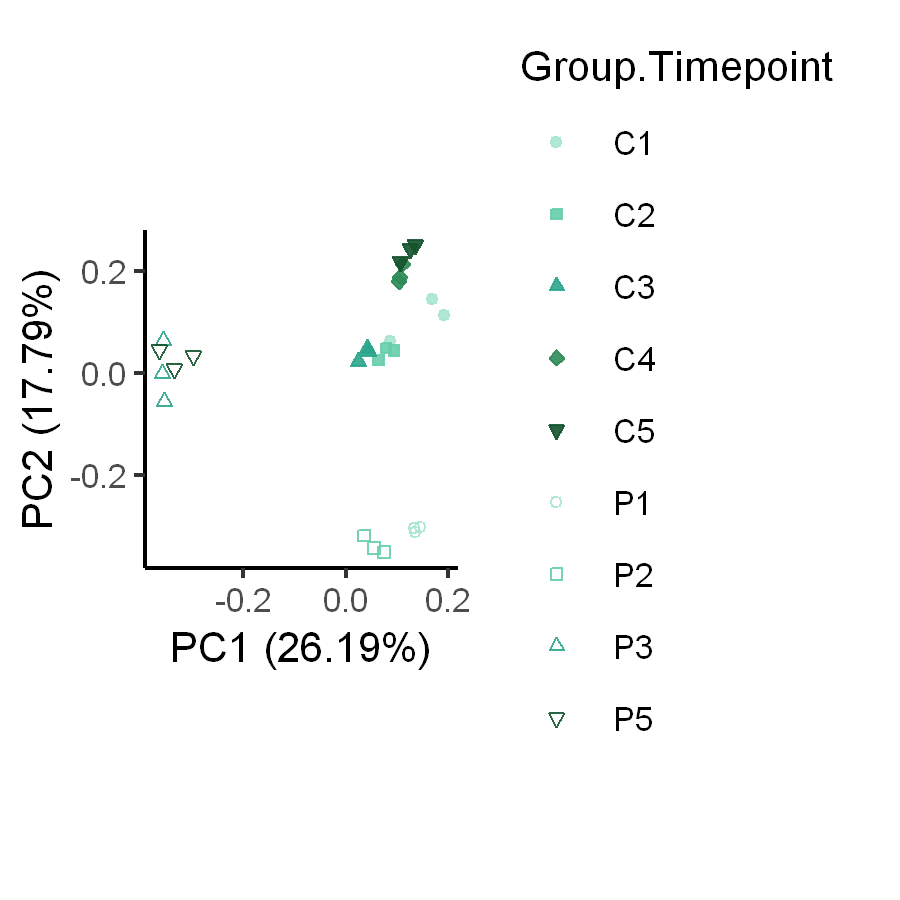

In [15]:

df = pivot_wider(
    mdf, id_cols=c('Sample', 'Group','Timepoint','replicate','Group.Timepoint'), 
    names_from='protein_id', values_from = 'Intensity')
X = df %>% select(starts_with('WP_')) 
row.names(X) = df$Sample
#X
#    as.data.frame
pca_res <- prcomp(X, scale. = TRUE)
p = autoplot(pca_res, data=df, colour='Group.Timepoint',fill='Group.Timepoint', shape='Group.Timepoint', label=FALSE, size =1, stroke=1,
             alpha=0.9, position=position_jitter(h=0.1,w=0.1),
         label.vjust = -1.3, label.size = 1) +
  scale_color_manual(values = ann_colors$Group.Timepoint) +
  scale_fill_manual(values = ann_colors$Group.Timepoint) +
  scale_shape_manual(values=ann_colors$Group.Timepoint.shapes) +
  coord_fixed(ratio=1) +
#ggtitle("MED4 PCA (normalized intensity)") +
  theme_classic(base_size = 10)  

#p$layers[[1]]$aes_params$stroke <- 1
p


In [16]:
ggsave('figures/med4_proteome_pca.svg', width = 3, height = 3)

In [17]:
names(mdf)

[1] "Species"                          "Protein.Decoy.Contaminant.Target"
 [3] "Number.of.Peptides"               "Number.of.Unique.Peptides"       
 [5] "Number.of.PSMs"                   "Sequence.Coverage.Fraction"      
 [7] "name"                             "protein_id"                      
 [9] "Unique.Peptides"                  "Sequence.Coverage"               
[11] "Sample"                           "Intensity"                       
[13] "Group"                            "Timepoint"                       
[15] "replicate"                        "Group.Timepoint"

`summarise()` has grouped output by 'protein_id'. You can override using the `.groups` argument.


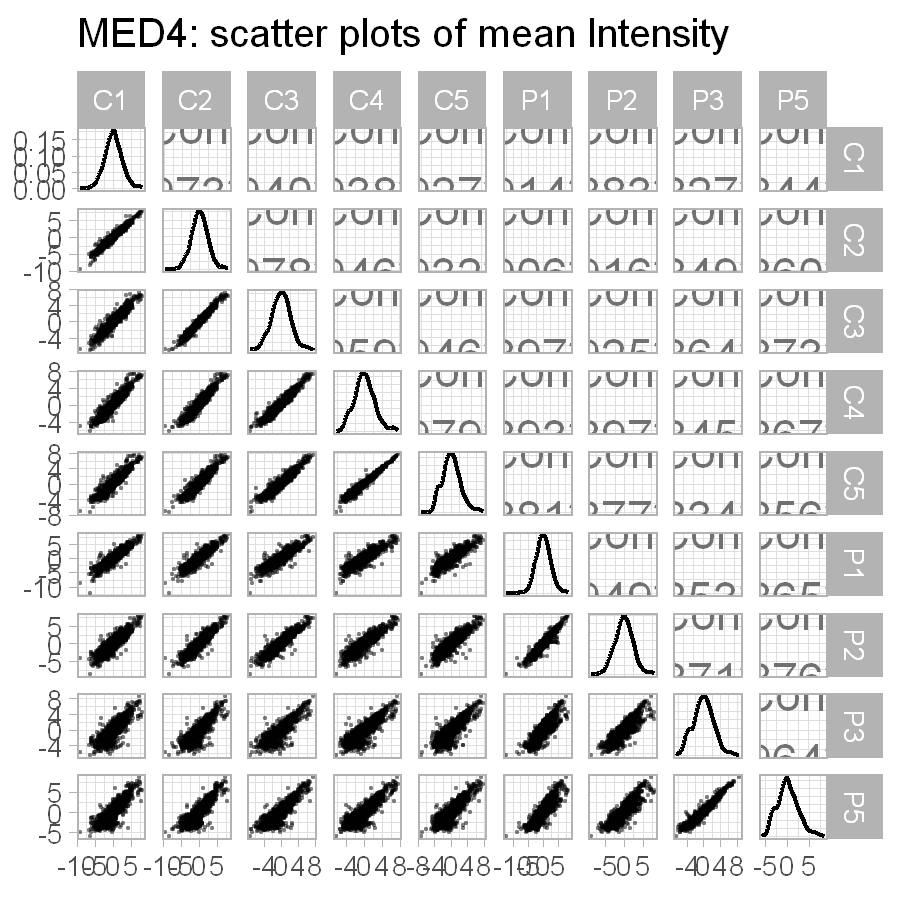

In [18]:
mdf %>%
   group_by(protein_id, Group.Timepoint)  %>%
   summarise(mean_Intensity = mean(Intensity)) %>%
   pivot_wider(names_from = Group.Timepoint, values_from = mean_Intensity) %>%
ggpairs(columns = c(2:10), lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        title='MED4: scatter plots of mean Intensity'
       ) +
  theme_light(base_size = 8)
  
   

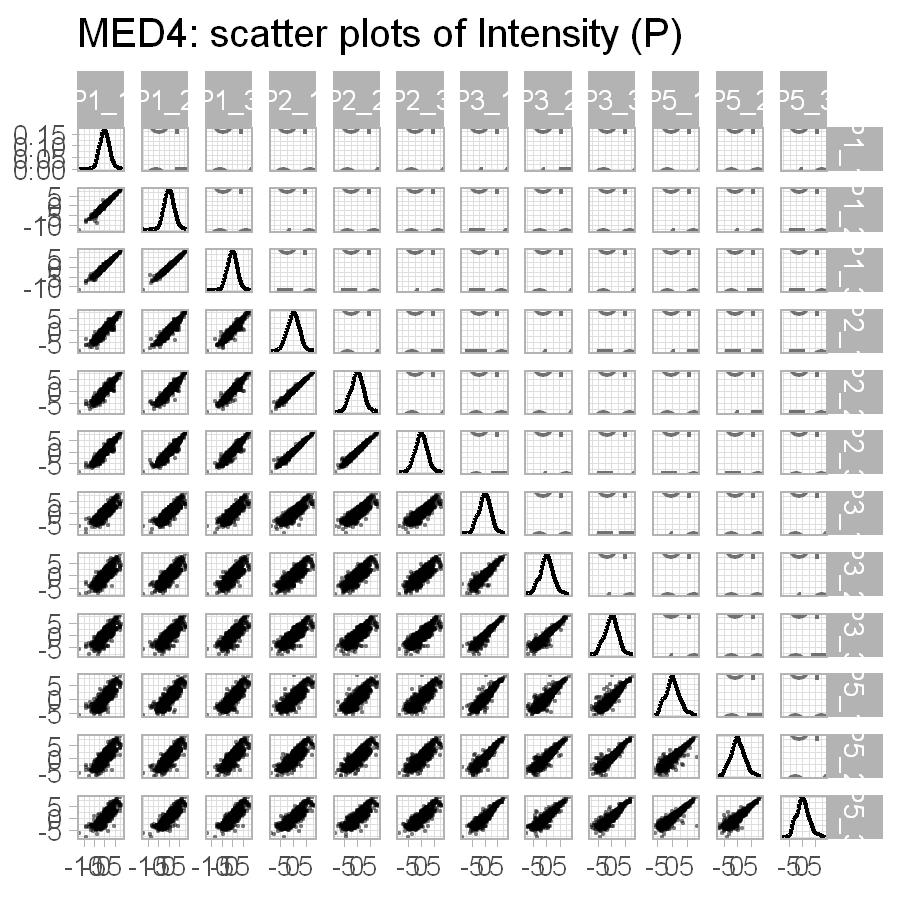

In [19]:
mdf %>%

   filter(Group == 'P') %>%
   select(Sample, Intensity, protein_id) %>%
   #group_by(protein_id, Group.Timepoint)  %>%
   #summarise(mean_Intensity = mean(Intensity)) %>%
   pivot_wider(names_from = Sample, values_from = Intensity) %>%
ggpairs(columns = c(2:13), lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        title='MED4: scatter plots of Intensity (P)'
       ) +
  theme_light(base_size = 8)
  
   

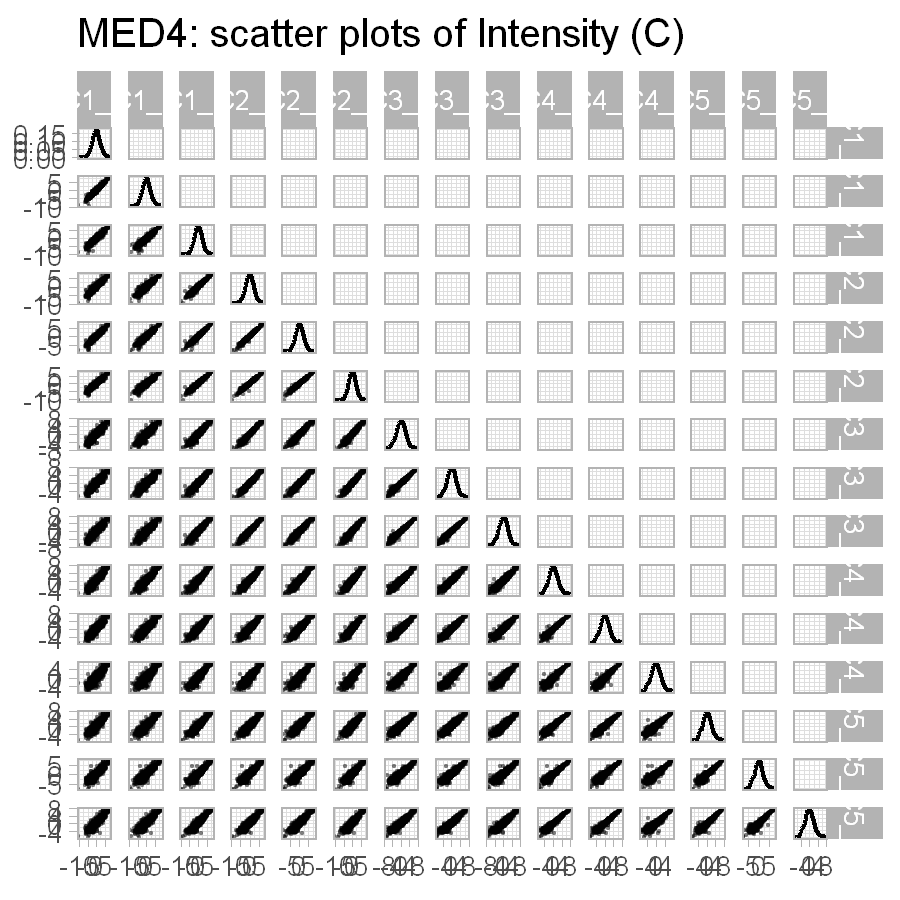

In [20]:
mdf %>%

   filter(Group == 'C') %>%
   select(Sample, Intensity, protein_id) %>%
   #group_by(protein_id, Group.Timepoint)  %>%
   #summarise(mean_Intensity = mean(Intensity)) %>%
   pivot_wider(names_from = Sample, values_from = Intensity) %>%
ggpairs(columns = c(2:16), lower = list(continuous = wrap("points", alpha = 0.3, size=0.1)),
        title='MED4: scatter plots of Intensity (C)'
       ) +
  theme_light(base_size = 8)
  
   

In [21]:
cdf = pivot_wider(
    mdf, id_cols=c('protein_id'), 
    names_from='Sample', values_from = 'Intensity') %>% column_to_rownames('protein_id')

head(cdf)

,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3,P3_1,P3_2,P3_3,P5_1,⋯,C2_3,C3_1,C3_2,C3_3,C4_1,C4_2,C4_3,C5_1,C5_2,C5_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WP_011133152.1,7.7386408,7.6203499,7.8481503,7.722785,7.688363,8.083828,3.64851284,3.8568907,3.3048029,4.251069,⋯,7.0471382,5.907307,5.681726,6.013789,6.442933,6.190625,5.869986,5.631097,5.622811,5.790801
WP_011132825.1,4.4848280,4.6353226,4.4711151,4.201722,4.254651,4.773293,5.85159779,5.7096605,5.7461901,6.197679,⋯,5.4867344,5.422384,5.119414,5.350366,5.525350,5.311805,5.217323,5.225019,5.131183,5.484208
WP_011132757.1,0.7538214,0.9428101,0.8554344,1.582704,1.379659,1.445036,0.07066059,0.5794344,0.7629499,1.701085,⋯,0.1382465,1.484032,1.172555,1.623282,1.796254,1.768653,1.249804,2.396539,1.805673,1.867908
WP_011132404.1,2.2156134,2.5591640,2.3943443,3.128482,2.948134,3.065042,3.25779247,3.4348249,2.9038401,2.852347,⋯,2.9582615,3.158932,3.071734,3.098945,1.987695,2.223659,2.166729,1.655236,1.797973,1.505015
WP_011132401.1,4.0907907,4.3361244,4.2792282,3.850692,4.240432,4.517277,5.76839542,5.4389696,5.6560545,5.905623,⋯,4.5998344,4.815557,4.387527,4.878127,4.769757,5.128566,4.540539,4.226443,4.322953,4.435864
WP_011132785.1,3.0735979,3.0963993,2.9183502,2.796327,2.790843,2.911247,1.70523548,1.3716097,1.2683039,1.072383,⋯,2.1962414,2.331039,2.069285,2.243299,2.438903,2.340068,1.867512,2.295159,2.215280,2.061799


In [22]:
spearman_cor = cor(cdf, method='spearman')
pearson_cor = cor(cdf, method='pearson')


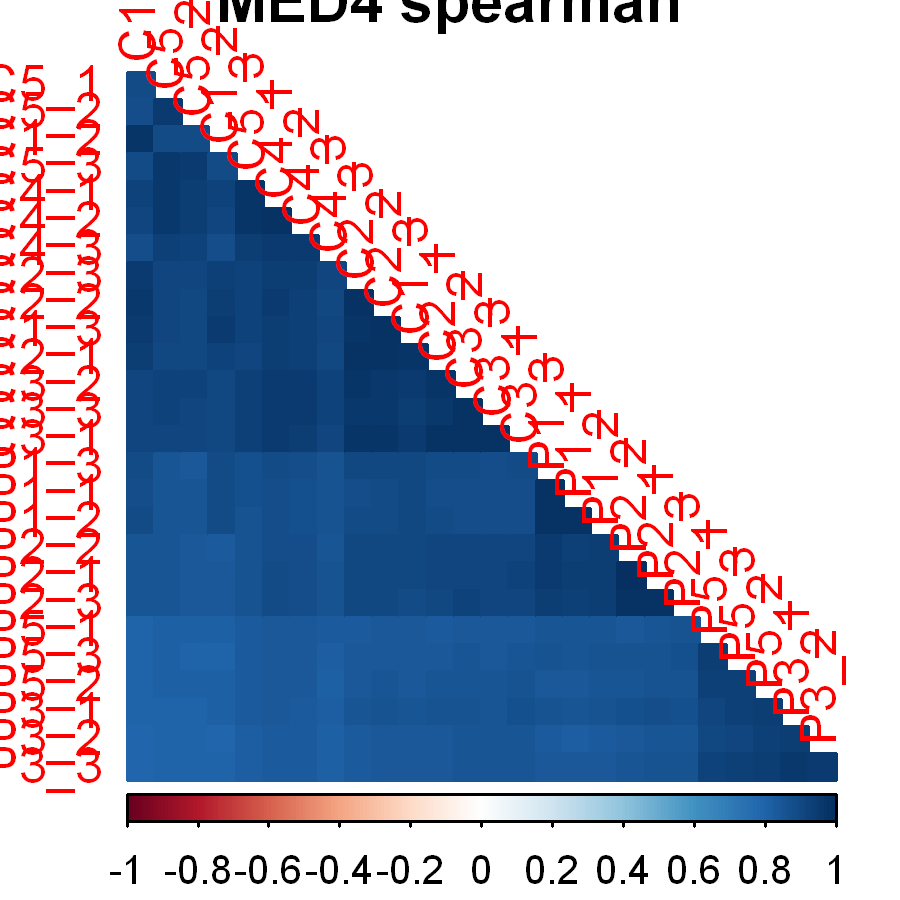

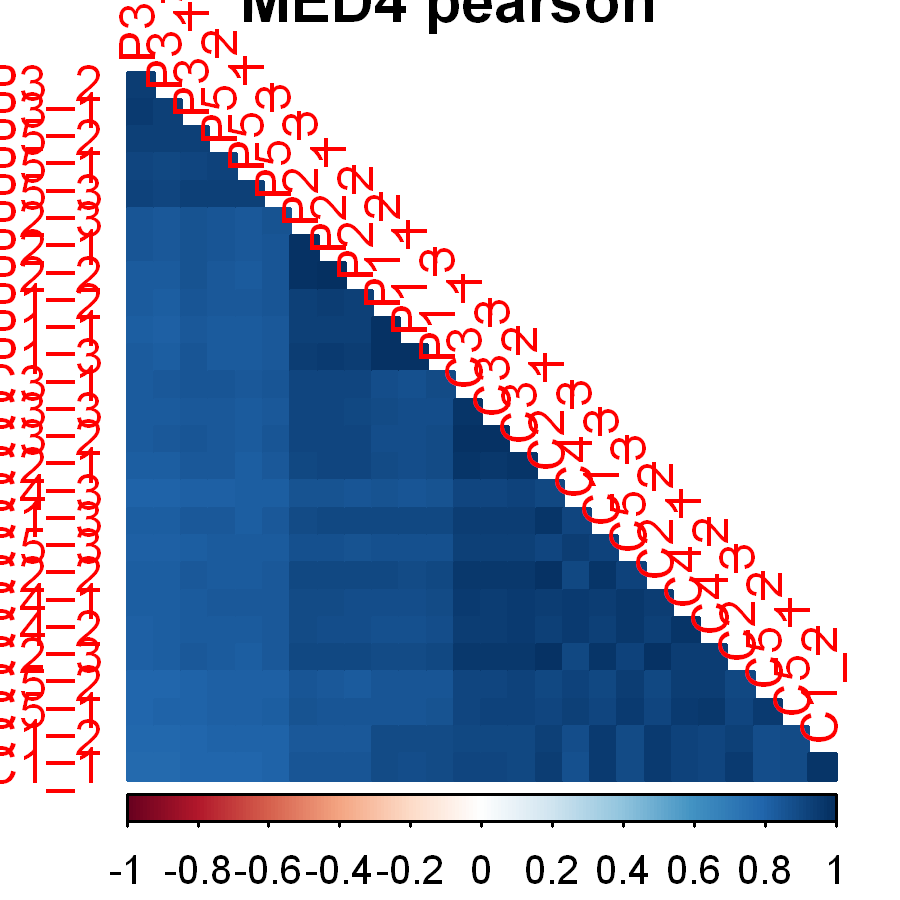

In [23]:
corrplot(spearman_cor, method="color", #tl.cex = .35, 
         order = 'AOE', diag = FALSE, type = 'lower', title='MED4 spearman')
corrplot(pearson_cor, method="color", #tl.cex = .35, 
         order = 'AOE', diag = FALSE, type = 'lower',title='MED4 pearson')


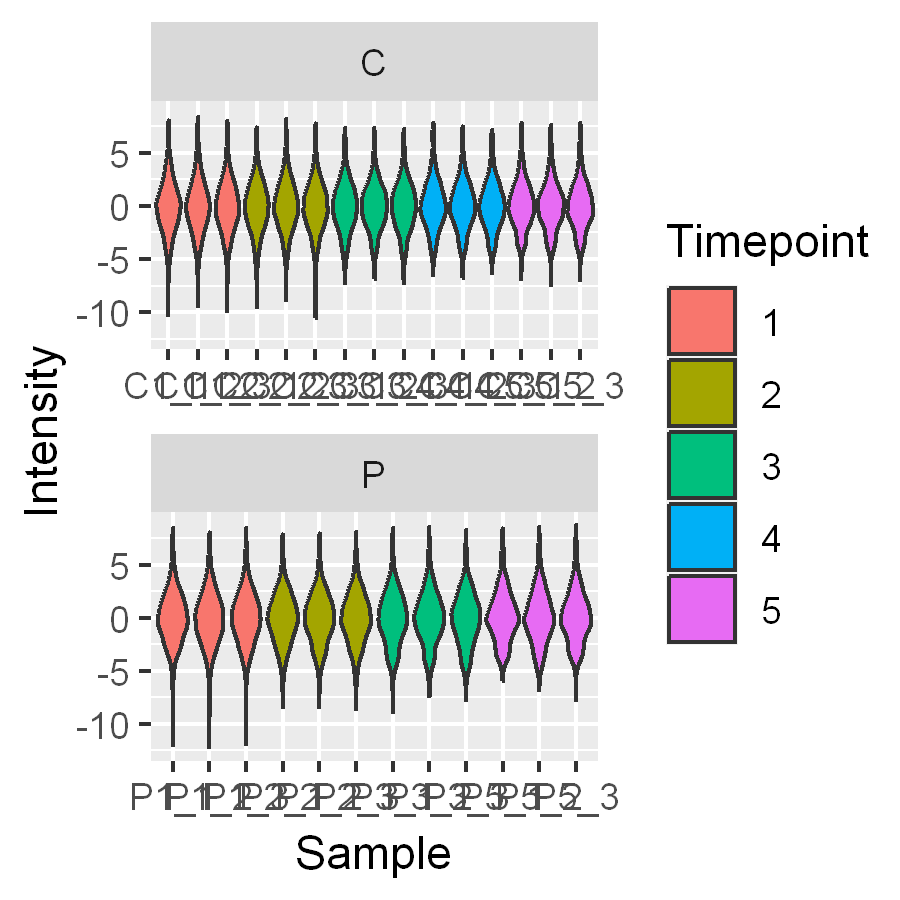

In [24]:
mdf %>%
ggplot(aes(x=Sample, y=Intensity, fill=Timepoint)) +
   geom_violin() +
facet_wrap(~Group, scales = "free_x", ncol=1)

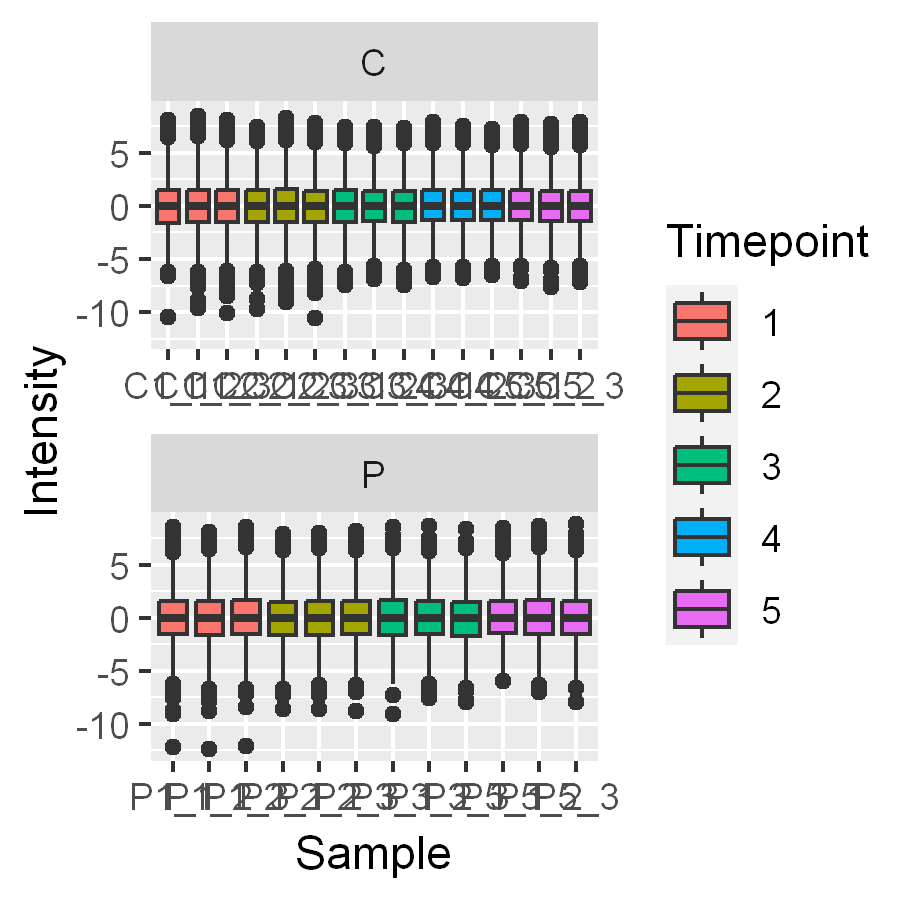

In [25]:
mdf %>%
ggplot(aes(x=Sample, y=Intensity, fill=Timepoint)) +
   geom_boxplot() +
facet_wrap(~Group, scales = "free_x", ncol=1)

# Axenic MED4 DE

In [26]:
library(DEqMS)

Loading required package: limma


Attaching package: 'limma'


The following object is masked from 'package:DESeq2':

    plotMA


The following object is masked from 'package:BiocGenerics':

    plotMA




In [27]:
cdf = mdf %>% filter(Group == 'P') %>% 
pivot_wider(id_cols=c('protein_id'), 
    names_from='Sample', values_from = 'Intensity') %>% column_to_rownames('protein_id')

head(cdf)

,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3,P3_1,P3_2,P3_3,P5_1,P5_2,P5_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WP_011133152.1,7.7386408,7.6203499,7.8481503,7.722785,7.688363,8.083828,3.64851284,3.8568907,3.3048029,4.251069,4.318355,5.1921253
WP_011132825.1,4.4848280,4.6353226,4.4711151,4.201722,4.254651,4.773293,5.85159779,5.7096605,5.7461901,6.197679,6.612435,6.6124439
WP_011132757.1,0.7538214,0.9428101,0.8554344,1.582704,1.379659,1.445036,0.07066059,0.5794344,0.7629499,1.701085,1.039477,0.8612823
WP_011132404.1,2.2156134,2.5591640,2.3943443,3.128482,2.948134,3.065042,3.25779247,3.4348249,2.9038401,2.852347,3.032043,2.8461647
WP_011132401.1,4.0907907,4.3361244,4.2792282,3.850692,4.240432,4.517277,5.76839542,5.4389696,5.6560545,5.905623,5.898013,6.4046650
WP_011132785.1,3.0735979,3.0963993,2.9183502,2.796327,2.790843,2.911247,1.70523548,1.3716097,1.2683039,1.072383,1.064094,1.0586700


In [28]:
num_unique = mdf %>% filter(Group == 'P') %>% # take out timepoint 5 - too different from everything else
    distinct(protein_id, Number.of.Unique.Peptides) %>% column_to_rownames('protein_id')

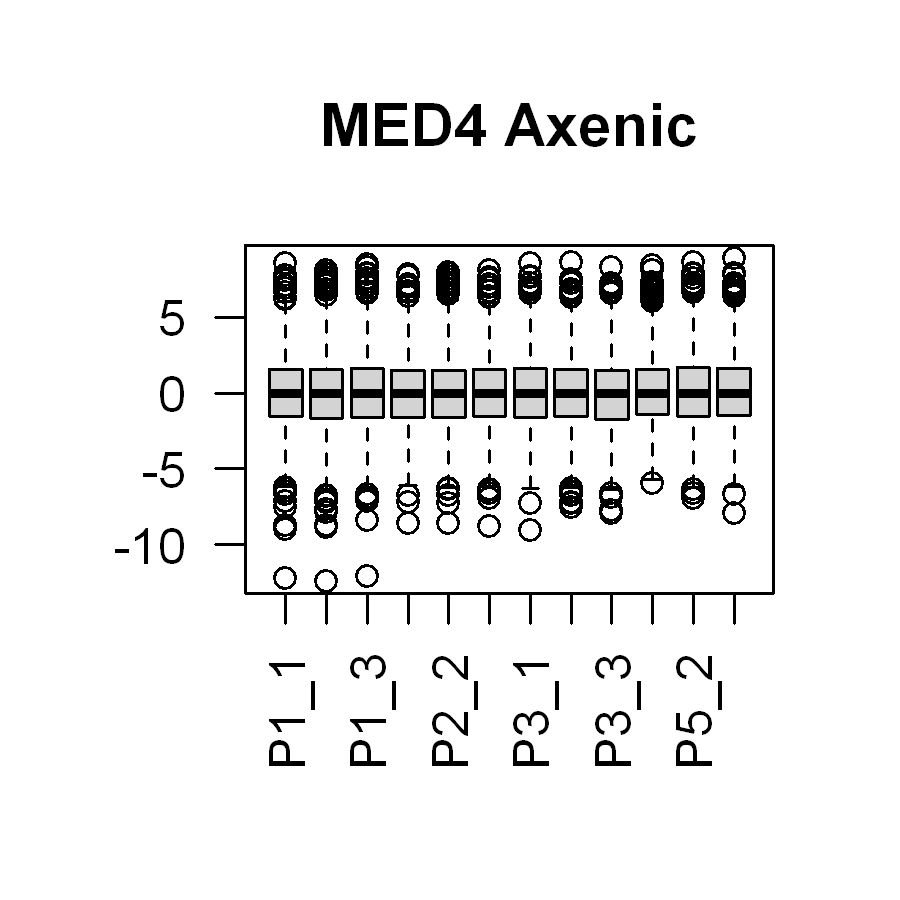

In [29]:
boxplot(cdf,las=2,main="MED4 Axenic")

In [30]:
names(cdf)

[1] "P1_1" "P1_2" "P1_3" "P2_1" "P2_2" "P2_3" "P3_1" "P3_2" "P3_3" "P5_1"
[11] "P5_2" "P5_3"

In [31]:
P = as.factor(substr(names(cdf), 2,2))
design = model.matrix(~0+P) # fitting without intercept
design

,P1,P2,P3,P5
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


In [32]:
fit1 = lmFit(cdf,design = design)
cont <- makeContrasts(P2-P1, P3-P1, P5-P1, levels = design)
fit2 = contrasts.fit(fit1,contrasts = cont)
fit3 <- eBayes(fit2)

In [33]:
fit3$count = num_unique[rownames(fit3$coefficients),"Number.of.Unique.Peptides"]

#check the values in the vector fit3$count
#if min(fit3$count) return NA or 0, you should troubleshoot the error first
min(fit3$count)

[1] 1

In [34]:
fit4 = spectraCounteBayes(fit3)

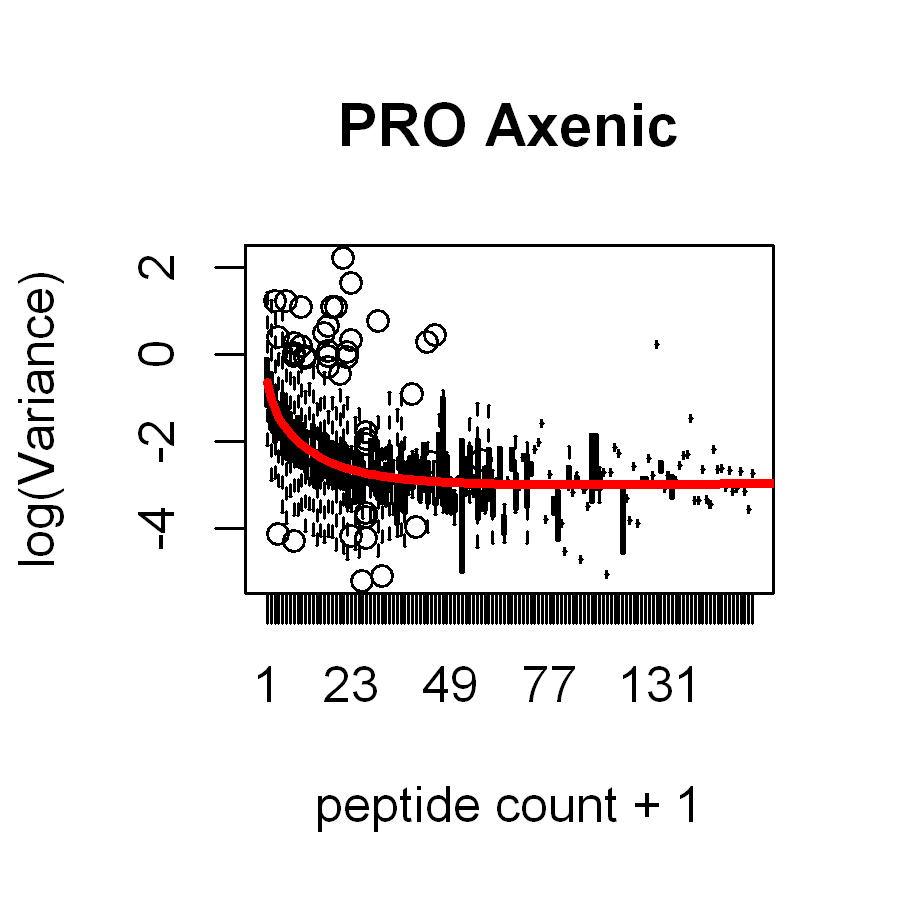

In [35]:
VarianceBoxplot(fit4, n=500, main = "PRO Axenic",
                xlab="peptide count + 1")

In [36]:
colnames(fit4$coefficients)

[1] "P2 - P1" "P3 - P1" "P5 - P1"

In [37]:
P2P1.results = outputResult(fit4,coef_col = 1) %>% mutate(contrast = 'P2 - P1')
P3P1.results = outputResult(fit4,coef_col = 2) %>% mutate(contrast = 'P3 - P1')
P5P1.results = outputResult(fit4,coef_col = 3) %>% mutate(contrast = 'P5 - P1')

P.results = bind_rows(P2P1.results, P3P1.results, P5P1.results)

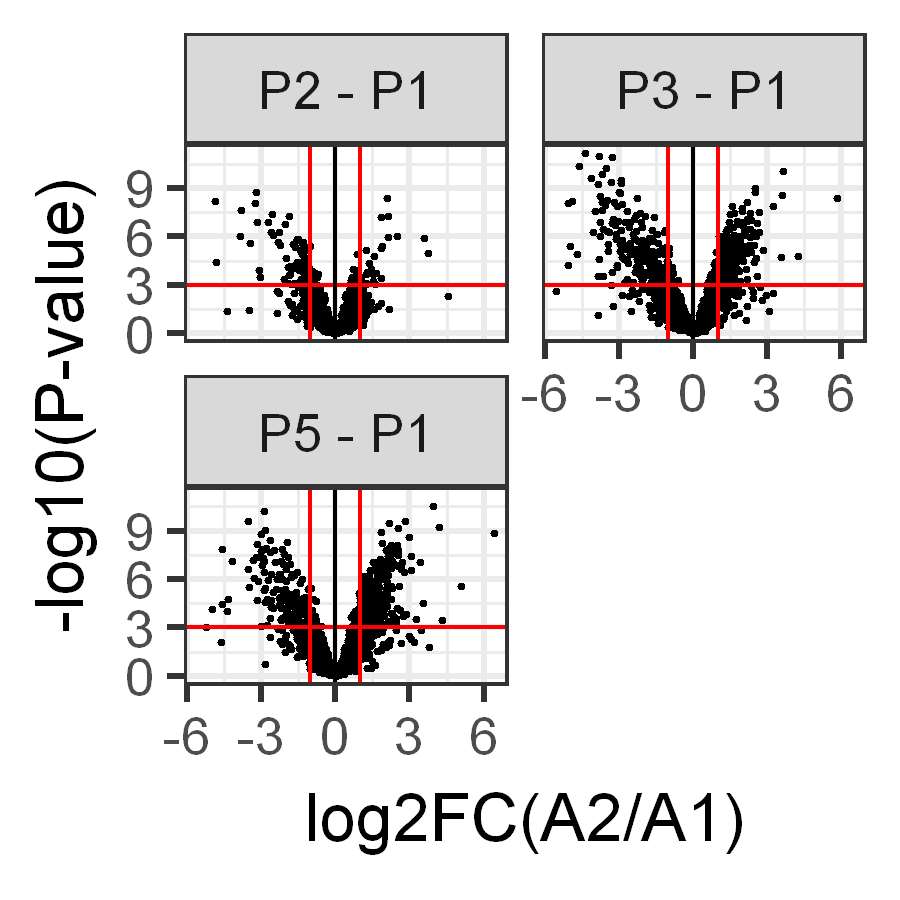

In [38]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

P.results$log.sca.pval = -log10(P.results$sca.P.Value)
ggplot(P.results, aes(x = logFC, y =log.sca.pval,  )) + 
    geom_point(size=0.5 )+
    theme_bw(base_size = 16) + # change theme
    xlab(expression("log2FC(A2/A1)")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    #scale_colour_manual(values = my.cols)+
    #geom_text_repel(data=subset(P.results, abs(logFC)>1&log.sca.pval > 3),
    #                aes( logFC, log.sca.pval ,label=gene.y), size=2, max.overlaps=100)  + # add gene label
    facet_wrap(~contrast, ncol=2)

# Limma - AX PRO longterm 

In [39]:
cdf = mdf %>% filter(Group == 'P') %>%
pivot_wider(id_cols=c('protein_id'), 
    names_from='Sample', values_from = 'Intensity') %>% column_to_rownames('protein_id')

head(cdf)

,P1_1,P1_2,P1_3,P2_1,P2_2,P2_3,P3_1,P3_2,P3_3,P5_1,P5_2,P5_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WP_011133152.1,7.7386408,7.6203499,7.8481503,7.722785,7.688363,8.083828,3.64851284,3.8568907,3.3048029,4.251069,4.318355,5.1921253
WP_011132825.1,4.4848280,4.6353226,4.4711151,4.201722,4.254651,4.773293,5.85159779,5.7096605,5.7461901,6.197679,6.612435,6.6124439
WP_011132757.1,0.7538214,0.9428101,0.8554344,1.582704,1.379659,1.445036,0.07066059,0.5794344,0.7629499,1.701085,1.039477,0.8612823
WP_011132404.1,2.2156134,2.5591640,2.3943443,3.128482,2.948134,3.065042,3.25779247,3.4348249,2.9038401,2.852347,3.032043,2.8461647
WP_011132401.1,4.0907907,4.3361244,4.2792282,3.850692,4.240432,4.517277,5.76839542,5.4389696,5.6560545,5.905623,5.898013,6.4046650
WP_011132785.1,3.0735979,3.0963993,2.9183502,2.796327,2.790843,2.911247,1.70523548,1.3716097,1.2683039,1.072383,1.064094,1.0586700


In [40]:
num_unique = mdf %>% filter(Group == 'P') %>% 
    distinct(protein_id, Number.of.Unique.Peptides) %>% column_to_rownames('protein_id')

In [41]:
n =substr(names(cdf), 2,2)
n[n %in% c('3', '5')] = 'longterm'
# n[n %in% c('2', '3')] = 'decline'

P = as.factor(n)
design = model.matrix(~0+P) # fitting without intercept
design

,P1,P2,Plongterm
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1
10,0,0,1


In [42]:
fit1 = lmFit(cdf,design = design)
#cont <- makeContrasts(C2-C1, C3-C1, C4 - C1, C5 - C1, levels = design)
#fit2 = contrasts.fit(fit1,contrasts = cont)
cont <- makeContrasts(Plongterm-P1, Plongterm-P2,  levels = design)
fit2 = contrasts.fit(fit1,contrasts = cont)
fit3 <- eBayes(fit2)

In [43]:
fit3$count = num_unique[rownames(fit3$coefficients),"Number.of.Unique.Peptides"]

#check the values in the vector fit3$count
#if min(fit3$count) return NA or 0, you should troubleshoot the error first
min(fit3$count)

[1] 1

In [44]:
fit4 = spectraCounteBayes(fit3)

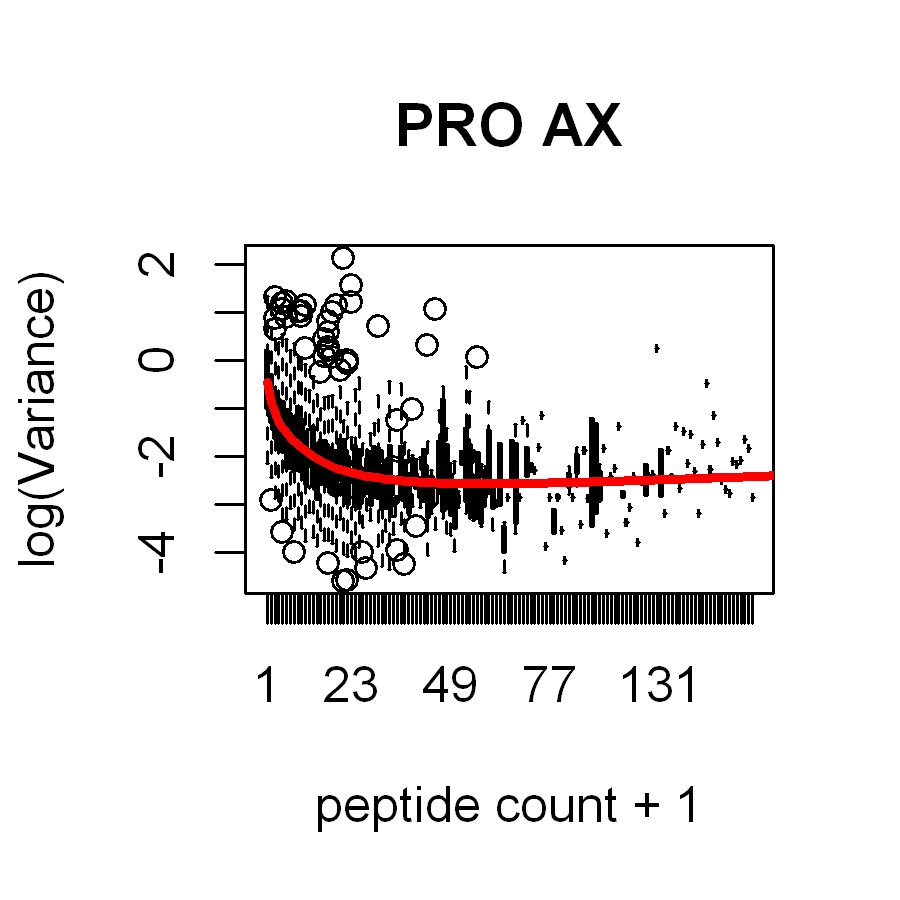

In [45]:
VarianceBoxplot(fit4, n=500, main = "PRO AX",
                xlab="peptide count + 1")

In [46]:
colnames(fit4$coefficients)

[1] "Plongterm - P1" "Plongterm - P2"

In [48]:
PltP1.results = outputResult(fit4,coef_col = 1) %>% mutate(contrast = 'Plongterm - P1')
PltP2.results = outputResult(fit4,coef_col = 2) %>% mutate(contrast = 'Plongterm - P2')

Plt.results = bind_rows(PltP1.results, PltP2.results)

In [49]:
P.results = bind_rows(P.results, Plt.results)

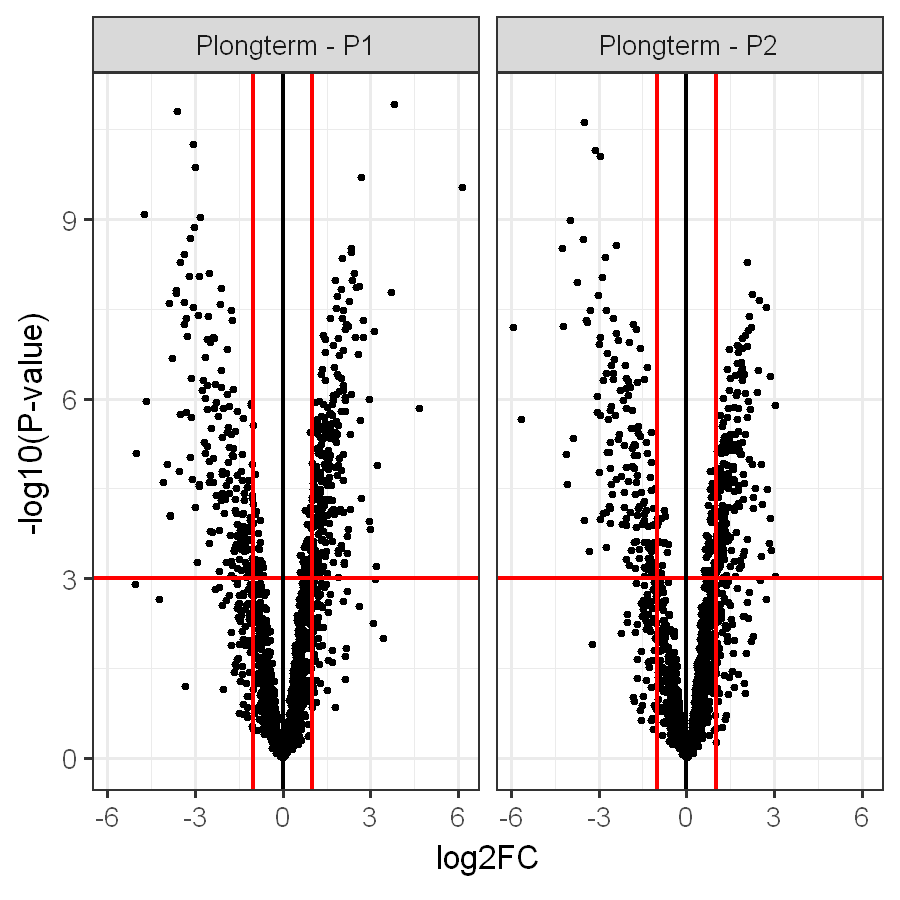

In [50]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

Plt.results$log.sca.pval = -log10(Plt.results$sca.P.Value)
ggplot(Plt.results, aes(x = logFC, y =log.sca.pval,  )) + 
    geom_point(size=0.5 )+
    theme_bw(base_size = 8) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    #scale_colour_manual(values = my.cols)+
    #geom_text_repel(data=subset(Clt.results, abs(logFC)>1&log.sca.pval > 3),
    #                aes( logFC, log.sca.pval ,label=gene.y), max.overlaps = Inf)  + # add gene label
    facet_wrap(~contrast, ncol=2)

# CC MED4 DE

In [51]:
cdf = mdf %>% filter(Group == 'C') %>% 
pivot_wider(id_cols=c('protein_id'), 
    names_from='Sample', values_from = 'Intensity') %>% column_to_rownames('protein_id')

head(cdf)

,C1_1,C1_2,C1_3,C2_1,C2_2,C2_3,C3_1,C3_2,C3_3,C4_1,C4_2,C4_3,C5_1,C5_2,C5_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WP_036930312.1,4.315192,3.904885,5.643631,6.592691,6.199080,6.069427,7.060764,6.669080,6.943257,7.363750,7.065671,6.874102,6.949040,6.998334,7.350987
WP_011132553.1,3.012233,2.490735,5.221550,6.429291,5.938936,6.009636,6.731760,6.419105,6.410733,6.177835,6.141454,6.116852,5.814738,5.596951,5.960504
WP_011133065.1,6.097384,7.786138,8.062645,7.142181,7.485416,7.019489,7.381798,7.382258,7.379933,7.442105,7.240170,7.172518,6.933459,7.373826,7.659724
WP_002805854.1,5.676785,5.820374,5.627089,5.524055,5.622326,5.657085,6.047516,6.028348,6.140056,7.355660,7.056380,6.902369,7.135177,7.320560,7.245799
WP_011133136.1,6.456103,6.871163,6.935638,6.593880,6.829687,6.576691,6.343586,6.008561,6.145251,6.628970,6.361516,6.209372,6.304336,6.273396,6.621615
WP_011133111.1,4.967328,5.436225,5.507900,5.092224,5.207661,4.755415,4.856405,4.556363,4.772334,5.145514,4.894708,4.929260,4.845759,4.710584,5.266555


In [52]:
num_unique = mdf %>% filter(Group == 'C') %>% # take out timepoint 5 - too different from everything else
    distinct(protein_id, Number.of.Unique.Peptides) %>% column_to_rownames('protein_id')

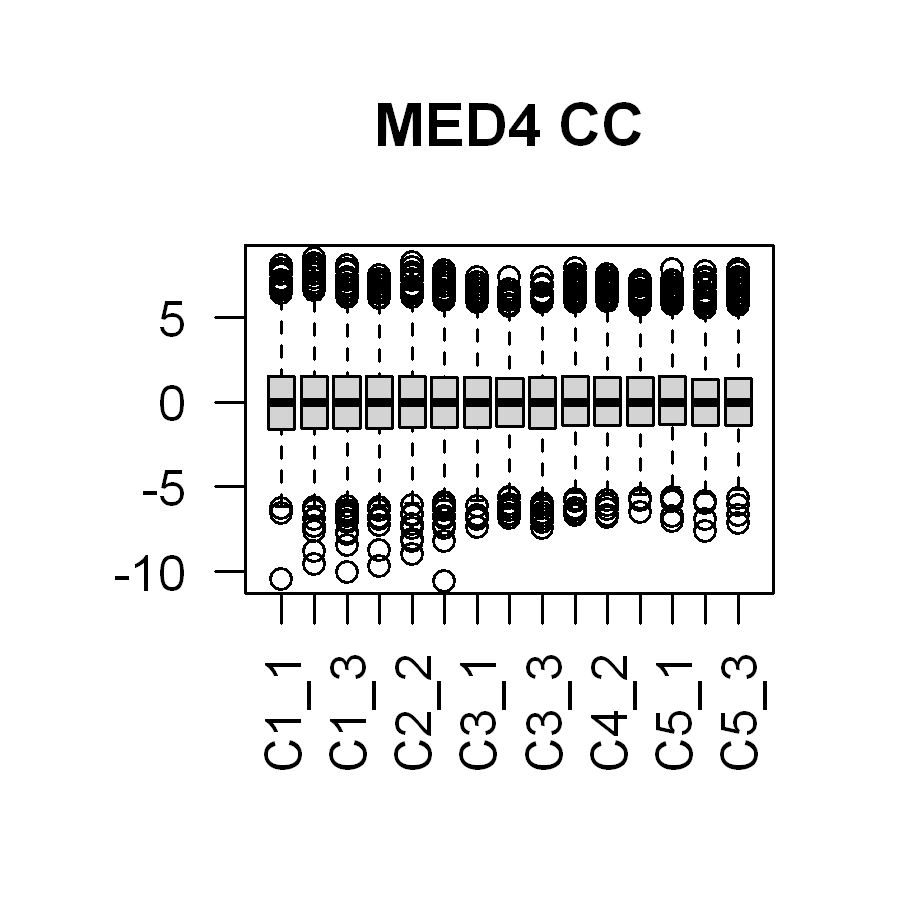

In [53]:
boxplot(cdf,las=2,main="MED4 CC")

In [54]:
names(cdf)

[1] "C1_1" "C1_2" "C1_3" "C2_1" "C2_2" "C2_3" "C3_1" "C3_2" "C3_3" "C4_1"
[11] "C4_2" "C4_3" "C5_1" "C5_2" "C5_3"

In [55]:
C = as.factor(substr(names(cdf), 2,2))
design = model.matrix(~0+C) # fitting without intercept
design

,C1,C2,C3,C4,C5
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0
10,0,0,0,1,0


In [56]:
fit1 = lmFit(cdf,design = design)
cont <- makeContrasts(C2-C1, C3-C1, C4 - C1, C5 - C1, C3-C2, C4 - C2, C5 - C2,C4 - C3, C5 - C3,C5 - C4, levels = design)
fit2 = contrasts.fit(fit1,contrasts = cont)
fit3 <- eBayes(fit2)

In [57]:
fit3$count = num_unique[rownames(fit3$coefficients),"Number.of.Unique.Peptides"]

#check the values in the vector fit3$count
#if min(fit3$count) return NA or 0, you should troubleshoot the error first
min(fit3$count)

[1] 1

In [58]:
fit4 = spectraCounteBayes(fit3)

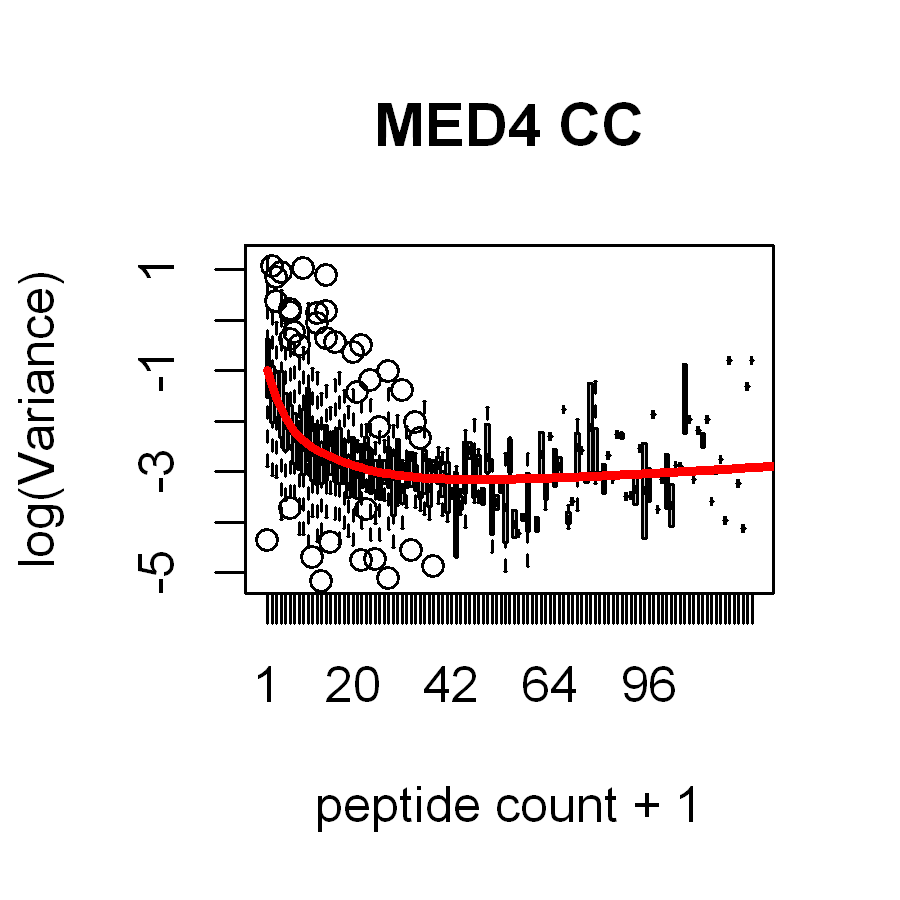

In [59]:
VarianceBoxplot(fit4, n=500, main = "MED4 CC",
                xlab="peptide count + 1")

In [60]:
colnames(fit4$coefficients)

[1] "C2 - C1" "C3 - C1" "C4 - C1" "C5 - C1" "C3 - C2" "C4 - C2" "C5 - C2"
 [8] "C4 - C3" "C5 - C3" "C5 - C4"

In [61]:
C2C1.results = outputResult(fit4,coef_col = 1) %>% mutate(contrast = 'C2 - C1')
C3C1.results = outputResult(fit4,coef_col = 2) %>% mutate(contrast = 'C3 - C1')
C4C1.results = outputResult(fit4,coef_col = 3) %>% mutate(contrast = 'C4 - C1')
C5C1.results = outputResult(fit4,coef_col = 4) %>% mutate(contrast = 'C5 - C1')
C3C2.results = outputResult(fit4,coef_col = 5) %>% mutate(contrast = 'C3 - C2')
C4C2.results = outputResult(fit4,coef_col = 6) %>% mutate(contrast = 'C4 - C2')
C5C2.results = outputResult(fit4,coef_col = 7) %>% mutate(contrast = 'C5 - C2')
C4C3.results = outputResult(fit4,coef_col = 8) %>% mutate(contrast = 'C4 - C3')
C5C3.results = outputResult(fit4,coef_col = 9) %>% mutate(contrast = 'C5 - C3')
C5C4.results = outputResult(fit4,coef_col =10) %>% mutate(contrast = 'C5 - C4')



C.results = bind_rows(
    C2C1.results, C3C1.results, C4C1.results, C5C1.results, 
    C3C2.results, C4C2.results, C5C2.results, 
    C4C3.results, C5C3.results, 
    C5C4.results)

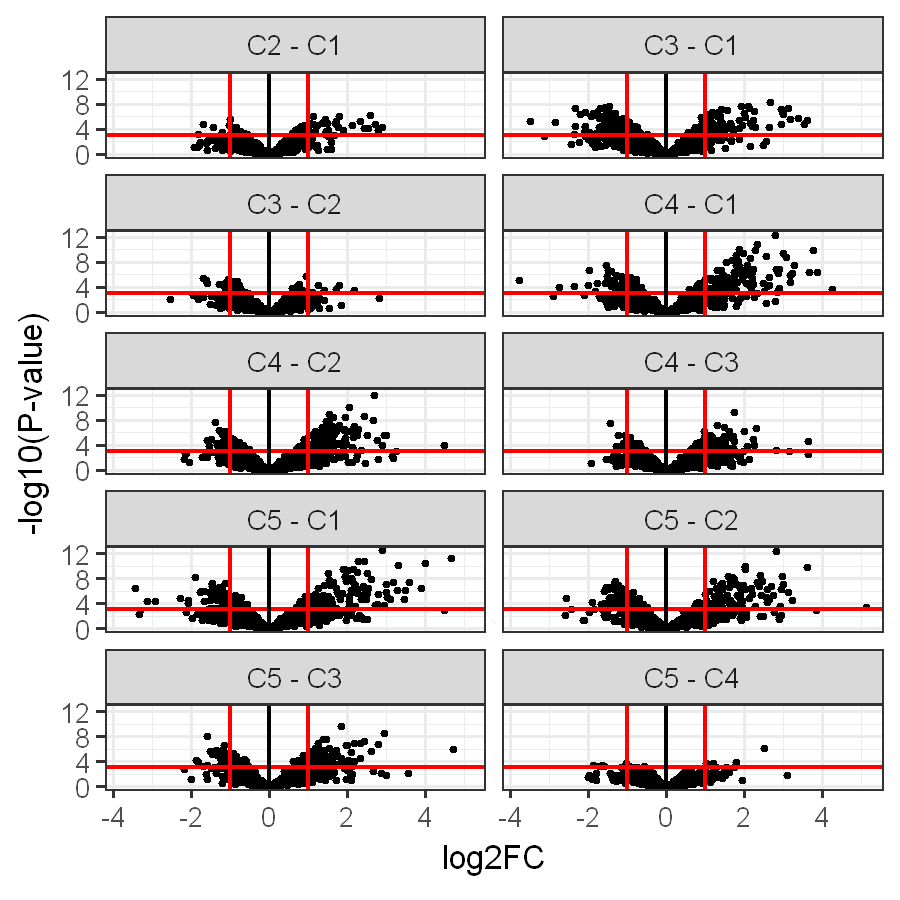

In [62]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

C.results$log.sca.pval = -log10(C.results$sca.P.Value)
ggplot(C.results, aes(x = logFC, y =log.sca.pval,  )) + 
    geom_point(size=0.5 )+
    theme_bw(base_size = 8) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    #scale_colour_gradient(low = "black", high = "black", guide = 'none')+
    #geom_text_repel(data=subset(C.results, abs(logFC)>1&log.sca.pval > 3),
    #                aes( logFC, log.sca.pval ,label=gene.y), max.overlaps = Inf,size=2)  + # add gene label
    facet_wrap(~contrast, ncol=2)

# Limma - CC PRO longterm 

In [63]:
cdf = mdf %>% filter(Group == 'C') %>%
pivot_wider(id_cols=c('protein_id'), 
    names_from='Sample', values_from = 'Intensity') %>% column_to_rownames('protein_id')

head(cdf)

,C1_1,C1_2,C1_3,C2_1,C2_2,C2_3,C3_1,C3_2,C3_3,C4_1,C4_2,C4_3,C5_1,C5_2,C5_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WP_036930312.1,4.315192,3.904885,5.643631,6.592691,6.199080,6.069427,7.060764,6.669080,6.943257,7.363750,7.065671,6.874102,6.949040,6.998334,7.350987
WP_011132553.1,3.012233,2.490735,5.221550,6.429291,5.938936,6.009636,6.731760,6.419105,6.410733,6.177835,6.141454,6.116852,5.814738,5.596951,5.960504
WP_011133065.1,6.097384,7.786138,8.062645,7.142181,7.485416,7.019489,7.381798,7.382258,7.379933,7.442105,7.240170,7.172518,6.933459,7.373826,7.659724
WP_002805854.1,5.676785,5.820374,5.627089,5.524055,5.622326,5.657085,6.047516,6.028348,6.140056,7.355660,7.056380,6.902369,7.135177,7.320560,7.245799
WP_011133136.1,6.456103,6.871163,6.935638,6.593880,6.829687,6.576691,6.343586,6.008561,6.145251,6.628970,6.361516,6.209372,6.304336,6.273396,6.621615
WP_011133111.1,4.967328,5.436225,5.507900,5.092224,5.207661,4.755415,4.856405,4.556363,4.772334,5.145514,4.894708,4.929260,4.845759,4.710584,5.266555


In [64]:
num_unique = mdf %>% filter(Group == 'C') %>% 
    distinct(protein_id, Number.of.Unique.Peptides) %>% column_to_rownames('protein_id')

In [65]:
n =substr(names(cdf), 2,2)
n[n %in% c('4', '5')] = 'longterm'
# n[n %in% c('2', '3')] = 'decline'

C = as.factor(n)
design = model.matrix(~0+C) # fitting without intercept
design

,C1,C2,C3,Clongterm
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


In [66]:
fit1 = lmFit(cdf,design = design)
#cont <- makeContrasts(C2-C1, C3-C1, C4 - C1, C5 - C1, levels = design)
#fit2 = contrasts.fit(fit1,contrasts = cont)
cont <- makeContrasts(Clongterm-C1, Clongterm-C2, Clongterm-C3, levels = design)
fit2 = contrasts.fit(fit1,contrasts = cont)
fit3 <- eBayes(fit2)

In [67]:
fit3$count = num_unique[rownames(fit3$coefficients),"Number.of.Unique.Peptides"]

#check the values in the vector fit3$count
#if min(fit3$count) return NA or 0, you should troubleshoot the error first
min(fit3$count)

[1] 1

In [68]:
fit4 = spectraCounteBayes(fit3)

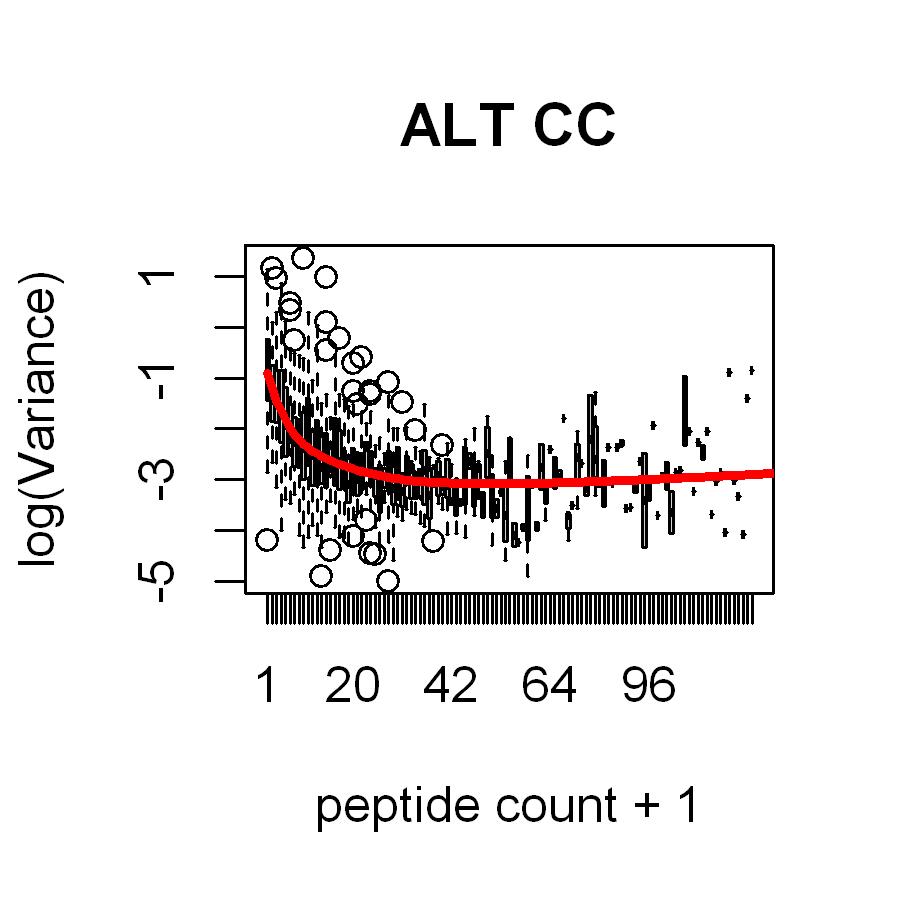

In [69]:
VarianceBoxplot(fit4, n=500, main = "ALT CC",
                xlab="peptide count + 1")

In [70]:
colnames(fit4$coefficients)

[1] "Clongterm - C1" "Clongterm - C2" "Clongterm - C3"

In [71]:
CltC1.results = outputResult(fit4,coef_col = 1) %>% mutate(contrast = 'Clongterm - C1')
CltC2.results = outputResult(fit4,coef_col = 2) %>% mutate(contrast = 'Clongterm - C2')
CltC3.results = outputResult(fit4,coef_col = 3) %>% mutate(contrast = 'Clongterm - C3')

Clt.results = bind_rows(CltC1.results, CltC2.results, CltC3.results)

In [72]:
C.results = bind_rows(C.results, Clt.results)

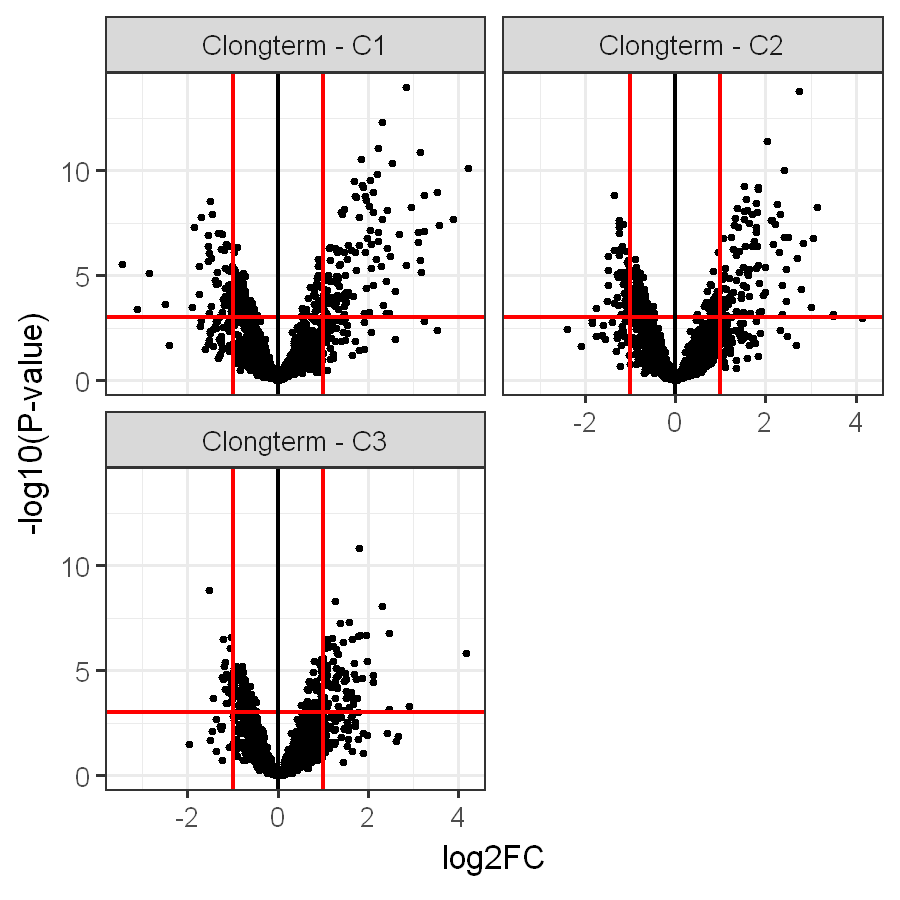

In [73]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

Clt.results$log.sca.pval = -log10(Clt.results$sca.P.Value)
ggplot(Clt.results, aes(x = logFC, y =log.sca.pval,  )) + 
    geom_point(size=0.5 )+
    theme_bw(base_size = 8) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    #scale_colour_manual(values = my.cols)+
    #geom_text_repel(data=subset(Clt.results, abs(logFC)>1&log.sca.pval > 3),
    #                aes( logFC, log.sca.pval ,label=gene.y), max.overlaps = Inf)  + # add gene label
    facet_wrap(~contrast, ncol=2)

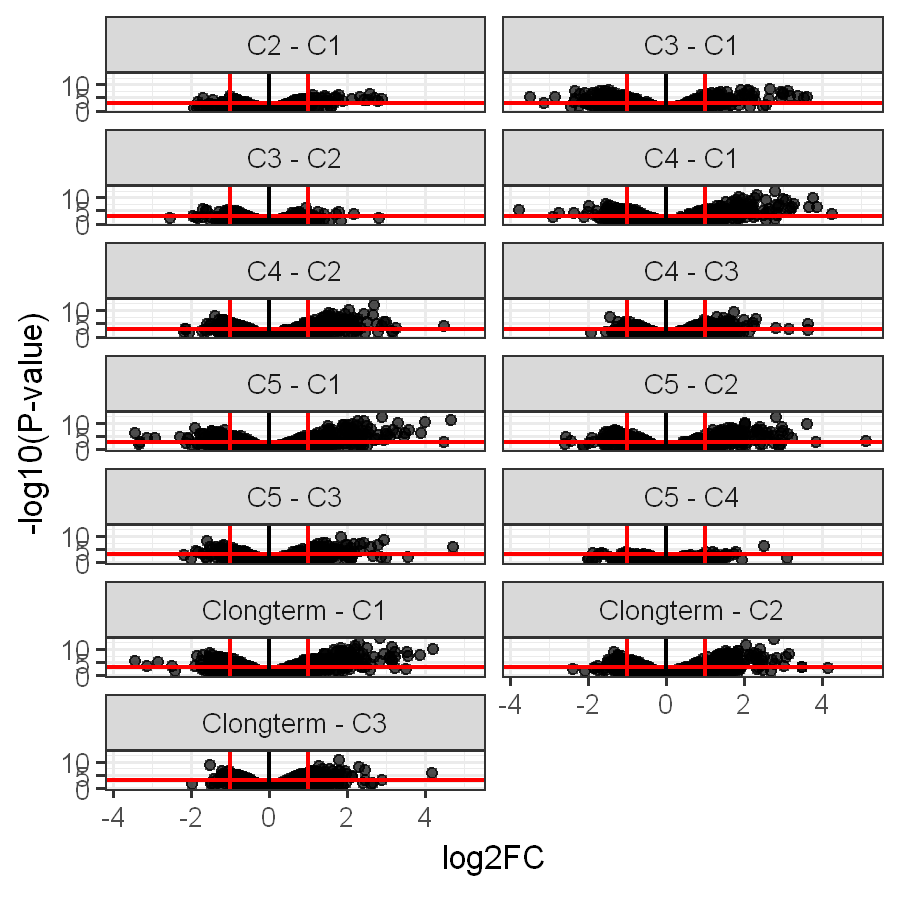

In [74]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

C.results$log.sca.pval = -log10(C.results$sca.P.Value)
ggplot(C.results, aes(x = logFC, y =log.sca.pval,  )) + 
    geom_point(size=1, alpha=0.7 )+
    theme_bw(base_size = 8) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    #scale_colour_manual(values = my.cols)+
    #geom_text_repel(data=subset(C.results, abs(logFC)>1&log.sca.pval > 3),
    #                aes( logFC, log.sca.pval ,label=gene.y), max.overlaps = Inf, size=1)  + # add gene label
    facet_wrap(~contrast, ncol=2)

In [75]:
write.csv(P.results, file.path('data', 'PRO_Axenic_DE.csv'))
write.csv(C.results, file.path('data', 'PRO_CC_DE.csv'))
